**Preprocessing**

In [3]:
#importing necessary libraries for preprocessing of training and testing data
import numpy as np
import pandas as pd 

In [4]:
#importing the training and testing data
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


In [5]:
#reading train.csv
df = pd.read_csv("/kaggle/input/dataset/train.csv")

In [6]:
#collecting all the labels in the training data into a list called labels
labels=[]

for i in df['label']:
    labels.append(i)

In [14]:
#encoding the labels array using to_categorical method from tensorflow
labels_one_hot=to_categorical(labels,num_classes=10)

In [8]:
#collecting all the images and reshaping them to 28 x 28 size
images=[]
pix = df.iloc[:,1:]    

dpix = pix.values

for i in dpix:
    images.append(i.reshape(28,28))

In [9]:
#converting the images list to a numpy array 
images=np.array(images)

In [10]:
#converting the pixel data into float from int 
images=images.astype('float64')

In [11]:
#normalizing the pixel values to lie between 0 and 1
for i in range(42000):
    images[i]/=255.0

**CNN model**

In [13]:
#importing necessary libraries for building a CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Activation,Conv2D,BatchNormalization,Dropout,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [16]:
#The architecture of the CNN model
#A sequential model is selected for this purpose as it is basic and also easy to work on

model = Sequential()

#Block1
#Contains one Convolutional layer with a kernel size 3x3 and 8 filters. Initially 10 filters were used, after few test runs the no.of filters were reduced to 8
#RELU function was used as activation function
#Batch Normalization was used for more generalization of the filtered image and improves the training
#Max Pooling employed with a pool size of 2x2
model.add(Conv2D(filters=8,kernel_size=(3,3),input_shape=(28,28,1),padding='SAME'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Block2

model.add(Conv2D(filters=8,kernel_size=(3,3),padding='SAME'))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
          
#Flattening
model.add(Flatten())

#Dense Layer
#The number of neurons in the dense layer were initially set to 128, after a few runs it was reduced to 64 and then down to 16 to maintain less parameters
model.add(Dense(16))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10,activation='softmax'))


In [17]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [18]:
#batch_size was initially set to 32 with 100 epochs, after a few runs the batch_size was increased to 64 and the number of epochs were reduced to 30 as the accuracy didn't seem to improve after 30 during the 100 epoch and another 50 epoch run
model_data=model.fit(images,labels_one_hot,batch_size=64,epochs=30,validation_split=0.3)

Epoch 1/30
460/460 [==============================] - 15s 29ms/step - loss: 1.1117 - accuracy: 0.6791 - val_loss: 0.9682 - val_accuracy: 0.7130
Epoch 2/30
460/460 [==============================] - 13s 29ms/step - loss: 0.5046 - accuracy: 0.8520 - val_loss: 0.2255 - val_accuracy: 0.9456
Epoch 3/30
460/460 [==============================] - 13s 28ms/step - loss: 0.3794 - accuracy: 0.8846 - val_loss: 0.1515 - val_accuracy: 0.9598
Epoch 4/30
460/460 [==============================] - 13s 28ms/step - loss: 0.3253 - accuracy: 0.8975 - val_loss: 0.1200 - val_accuracy: 0.9653
Epoch 5/30
460/460 [==============================] - 13s 29ms/step - loss: 0.2898 - accuracy: 0.9102 - val_loss: 0.1007 - val_accuracy: 0.9710
Epoch 6/30
460/460 [==============================] - 13s 28ms/step - loss: 0.2658 - accuracy: 0.9163 - val_loss: 0.0963 - val_accuracy: 0.9730
Epoch 7/30
460/460 [==============================] - 13s 29ms/step - loss: 0.2593 - accuracy: 0.9183 - val_loss: 0.1056 - val_accuracy:

In [19]:
#saving the model
model.save('DCS.keras')

In [20]:
#reading the test data
df_test=pd.read_csv('/kaggle/input/dataset/test.csv')

In [21]:
#putting the training the images into a list and reshaping them to 28x28
images_test=[]
pix_test = df_test.iloc[:,0:]    

dpix_test = pix_test.values

for i in dpix_test:
    images_test.append(i.reshape(28,28))

In [22]:
#the list is converted to a numpy array
images_test=np.array(images_test)

In [23]:
#pixel values are converted to float from int 
images_test=images_test.astype('float64')

In [24]:
#normalizing the pixel values to lie between 0 and 1
images_test/=255.0

In [26]:
#predicting the results and storing it in a variable called predictions
predictions=model.predict(images_test)

875/875 [==============================] - 6s 6ms/step


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 batch_normalization (Batch  (None, 28, 28, 8)         32        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 28, 28, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         5

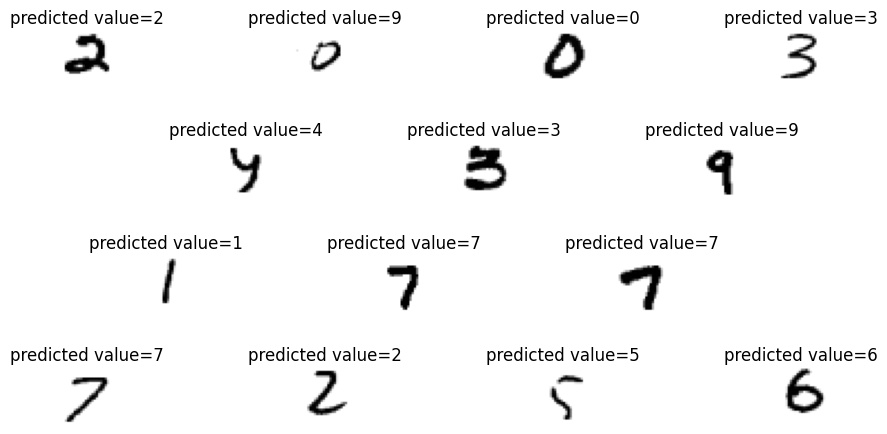

In [32]:
#few sample outputs
from matplotlib import pyplot as plt

plt.figure(figsize=(10,6))
for i in range(0,40,3):
    plt.subplot(4, 10, i+1)
    plt.imshow(images_test[i],cmap=plt.cm.binary)
    pred_class=np.argmax(predictions[i])
    plt.title("predicted value=%d" % pred_class,y=0.9)
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=-0.1)
plt.show()

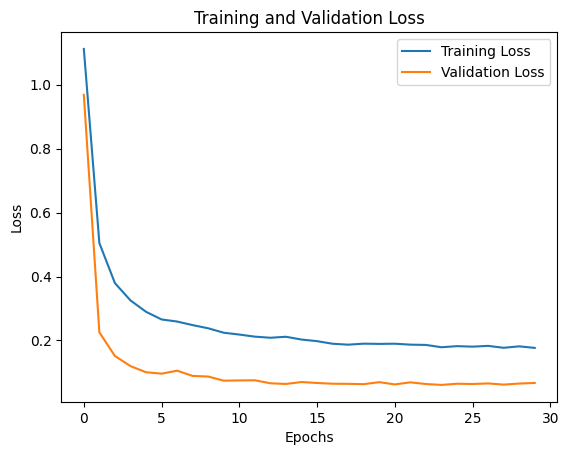

In [28]:
#graph for visualizing training and validation loss against number of epochs
plt.plot(model_data.history['loss'], label='Training Loss')
plt.plot(model_data.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()